# Bike Sharing Assignment

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings


In [2]:
## Importing all required libraries for model building, evaluation and prediction
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import pearsonr

In [3]:
warnings.filterwarnings('ignore')

# Step 1 - Read, Understand and Analyze the data

In [4]:
## Read the data
df=pd.read_csv('day.csv')
df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no missing column in the dataset

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.value_counts().sum() 

730

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in any of the columns

In [10]:
## checking if there are any duplicate values and drop them

df1=df.copy()

In [11]:
# remove the duplicates in the new dataframe created
df1.drop_duplicates(inplace=True)

In [12]:
## check the shape of new dataframe after dropping
df1.shape

(730, 16)

#### Same original shape is retained which means there are no duplicates hence we can proceed with the original data frame.

In [13]:
## The instant column is just record index, it is kind of repetitive with the row number and hence can be removed

df.drop(['instant'], inplace=True, axis=1)

In [14]:
df.shape

(730, 15)

In [15]:
##casual and registered are part of cnt column, hence we can drop it

df.drop(['casual','registered'],axis=1,inplace=True)

In [16]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step 2 - Data Preparation

### 2.1 Encoding/mapping

#### We need to perform encoding of some of the columns as given in the problem statement.



In [17]:
## Season column
df.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

For season column, the min is 1 and the max is 4 as found while describe() function is done. Hence we need to map them accordingly as given in the dataset.

Season now becomes a categorical value. This can be used to generate dummy variable as this is now categorical data.

#### 1: spring 
#### 2: summer
#### 3: fall
#### 4: winter

In [18]:
df.season=df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [19]:
## Month column
df.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

For month column, min is 1 and max is 12 which means all values lie within the month range and there is abnormality/outlier in this column.

Month is mapped to the corresponding names, hence this also becomes categorical which can be used for dummy variable generation.

In [20]:
df.mnth=df.mnth.apply(lambda x: datetime.date(1900,x,1).strftime('%B'))

In [21]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,January,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,January,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,January,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,January,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,January,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
## Weekday column
df.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

Weekday is between 0 to 6 which again falls within the range and there is no abnormality/outlier in this column.

Weekday is mapped to corresponding columns as categorical variables.

Sunday is mapped to 0 and is considered to be the first day of the week in USA. Hence, it is mapped accordingly. And from the working day column we can see that 0 is Sunday.

#### 0: sunday
#### 1: monday
#### 2: tuesday
#### 3: wednesday
#### 4: thursday
#### 5: friday
#### 6: saturday

In [23]:
df.weekday=df.weekday.map({0: "sunday",1: "monday",2: "tuesday",3: "wednesday",4: "thursday",5: "friday",6: "saturday"})

In [24]:
## weathersit column
df.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

Min is 1 and max is 3, we will map them according to the values given in the data dictionary.

weathersit :
		1: Clear, Few clouds, Partly cloudy, Partly cloudy\ 
        2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\ 
		3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\
		4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        
        
With short forms for our easier interpretation\
            **1: clear**\
            **2: mist**\
            **3: light**\
            **4: heavy**

In [25]:
df.weathersit=df.weathersit.map({1:"clear",2:"mist",3:"light",4:"heavy"})

In [26]:
df.dteday = df.dteday.apply(lambda x: int(x.split('-')[0]))

In [27]:
##dteday column - check if the date column lies within the range

df.dteday.describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

As min is 1 and max is 31, the entire dataset lies within the date range.

In [28]:
## year column 
df.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

Year's values are 0 and 1 as given in the data dictionary, we don't need to convert this, as it is already in the normalized form of 0 and 1, so changing this will not have any effect.

In [29]:
df.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

Holiday's values are 0 and 1 as given in the data dictionary, we don't need to convert this, as it is already in the normalized form of 0 and 1, so changing this will not have any effect.

# Step 3 -  Visualization of Data

In [30]:
## Defining the plot function that we will commonly use across to plot
def plot_fn(data, title_of_graph, x_label, y_label, data_label='horizontal', x_label_rotation=0, x_text=None, color=None):
    graph = sns.barplot(x=data.index, y=data.values)
    label_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        graph.text(index, value[1] + label_above_y_axis, round(value[1], 2),color='red', ha="center", rotation=data_label)       
    if x_text is None:
        graph.set_xticklabels(graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(title_of_graph) ##, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

season
spring    2608.411111
winter    4728.162921
summer    4992.331522
fall      5644.303191
Name: cnt, dtype: float64


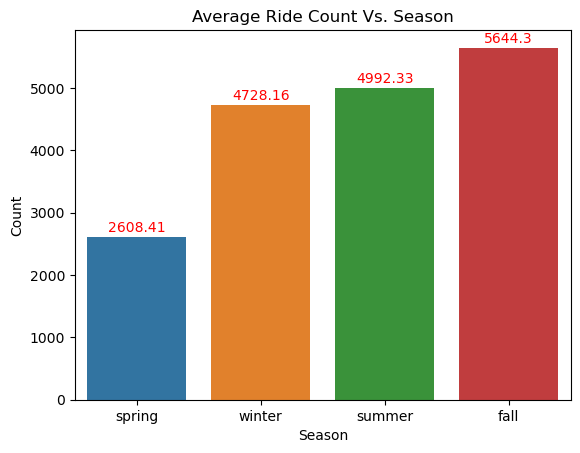

In [31]:


## Plotting of season
season_data = df.groupby(by='season').cnt.mean().sort_values() #.groupby(by='season').cnt.mean().sort_values()
#
print(season_data)
plot_fn(season_data, title_of_graph='Average Ride Count Vs. Season', x_label='Season',y_label='Count', data_label='horizontal',x_label_rotation=0, color="YlGn")

#### In order to visualize the categorical information against ride count, catplot from seaborn is used which can be used in common for any type of plots such as barplot, boxplot, swarmplot etc.

Text(0.5, 1.0, 'Comparison of ride count at every season in 2018 and 2019 years')

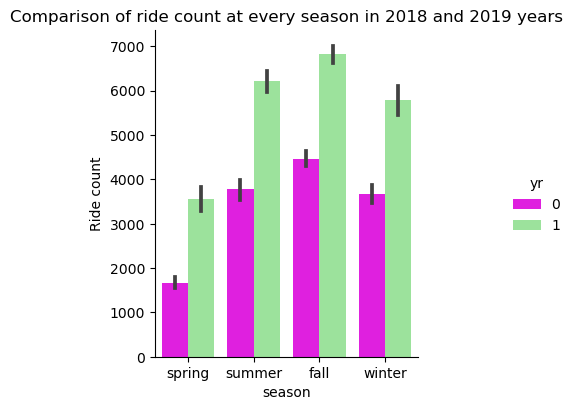

In [32]:
## Plotting of season Vs. ride count comparing against the years
g=sns.catplot(data=df, x='season', y='cnt', kind='bar', hue='yr',height=4, aspect=.9, palette=sns.color_palette(['magenta', 'lightgreen']))
plt.xlabel('season')
plt.ylabel('Ride count')
plt.title('Comparison of ride count at every season in 2018 and 2019 years')

The booking count has increased from the year 2018 to 2019 in all seasons. Fall seems to have the highest count of bookings.

Text(0.5, 1.0, 'Comparison of ride count at every season in 2018 and 2019 years')

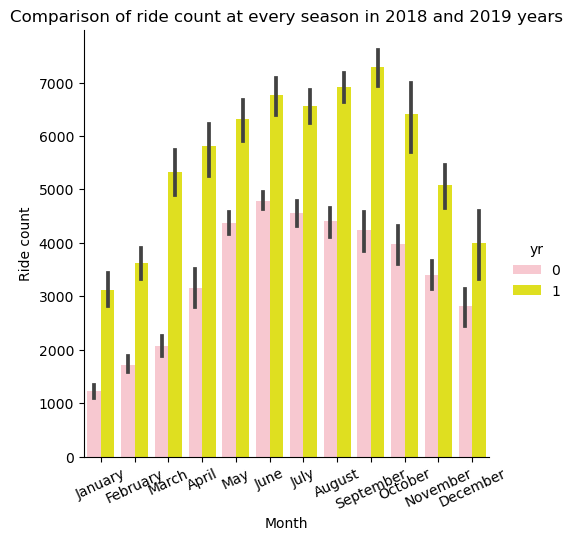

In [33]:
## Plotting of Month vs. ride count comparing against the years
g=sns.catplot(data=df, x='mnth', y='cnt', kind='bar', hue='yr' ,palette=sns.color_palette(['pink', 'yellow']))
plt.xlabel('Month')
plt.ylabel('Ride count')
plt.xticks(rotation = 25)
plt.title('Comparison of ride count at every season in 2018 and 2019 years')

The count is increased between the months of June to October which typically falls under the Summer and Fall seasons in USA.
During the mid of the year booking count is high compared to the beginning and end of the year.

Text(0.5, 1.0, 'Comparison of ride count at every season in 2018 and 2019 years')

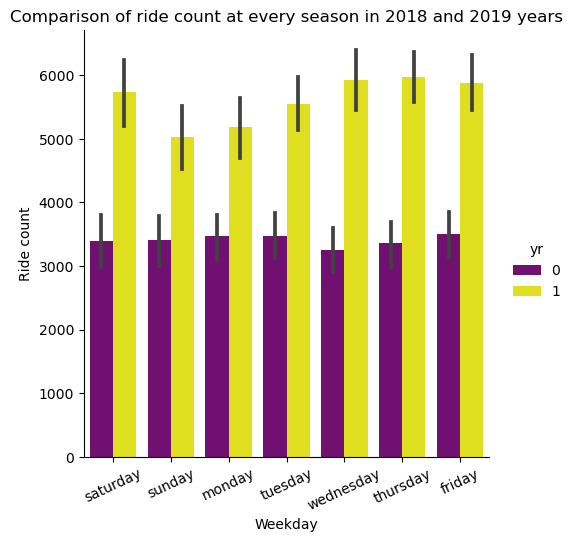

In [34]:
## Plotting of weekday vs. ride count comparing against the years
g=sns.catplot(data=df, x='weekday', y='cnt', kind='bar', hue='yr', palette=sns.color_palette(['purple', 'yellow']))
plt.xlabel('Weekday')
plt.ylabel('Ride count')
plt.xticks(rotation = 25)
plt.title('Comparison of ride count at every season in 2018 and 2019 years')

Most number of bookings are done on Wednesday, Thursday, Friday and Saturday which are typically working days of the week.

Text(0.5, 1.0, 'Comparison of ride count at every season in 2018 and 2019 years')

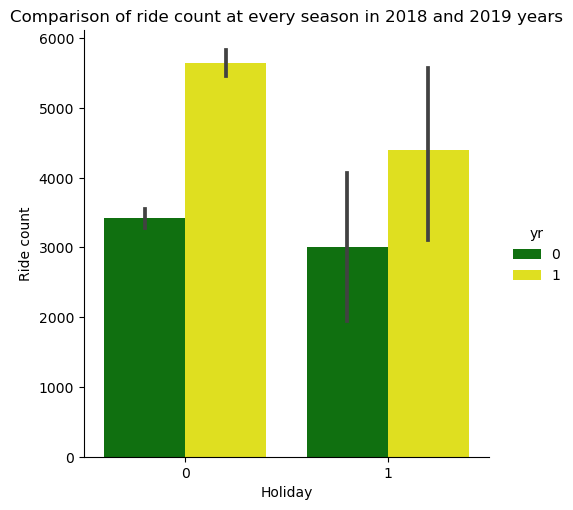

In [35]:
## Plotting of holiday vs. ride count comparing against the years
g=sns.catplot(data=df, x='holiday', y='cnt', kind='bar', hue='yr',palette=sns.color_palette(['green', 'yellow']))
plt.xlabel('Holiday')
plt.ylabel('Ride count')
plt.title('Comparison of ride count at every season in 2018 and 2019 years')

Holiday of 0 and 1 corresponds to if it is a holiday or not. It is understood that if it is a holiday, people don't book and hence would be spending time at home with family or may be on vacation.

Text(0.5, 1.0, 'Comparison of ride count at every season in 2018 and 2019 years')

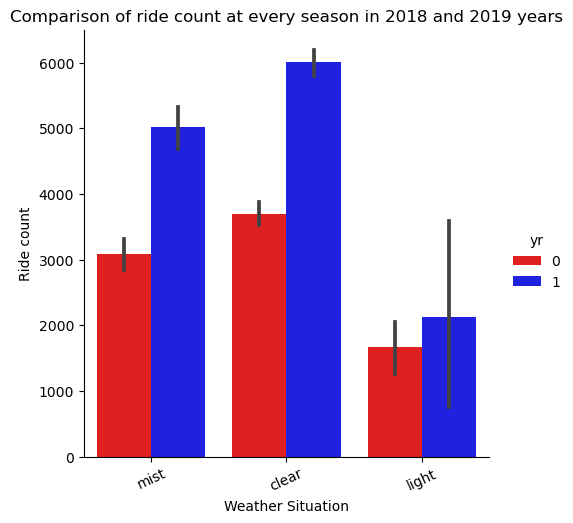

In [36]:
## Plotting of weather situation vs. ride count comparing against the years
g=sns.catplot(data=df, x='weathersit', y='cnt', kind='bar', hue='yr', palette=sns.color_palette(['red', 'blue']))
plt.xlabel('Weather Situation')
plt.ylabel('Ride count')
plt.xticks(rotation = 25)
plt.title('Comparison of ride count at every season in 2018 and 2019 years')

When the weather is clear, typically people use bikes, or else they would be going in for another option such as car in case if it rains.

Text(0.5, 1.0, 'Comparison of ride count at every season in 2018 and 2019 years')

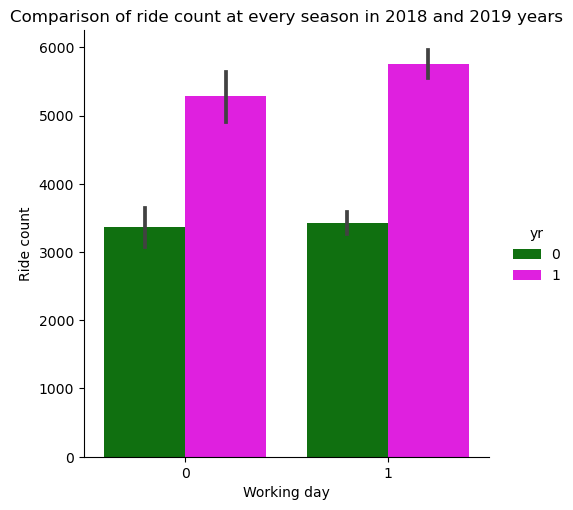

In [37]:
## Plotting of working day vs. ride count comparing against the years
g=sns.catplot(data=df, x='workingday', y='cnt', kind='bar', hue='yr', palette=sns.color_palette(['green', 'magenta']))
plt.xlabel('Working day')
plt.ylabel('Ride count')
plt.title('Comparison of ride count at every season in 2018 and 2019 years')

If it is either a working day or not, the booking is almost similar.

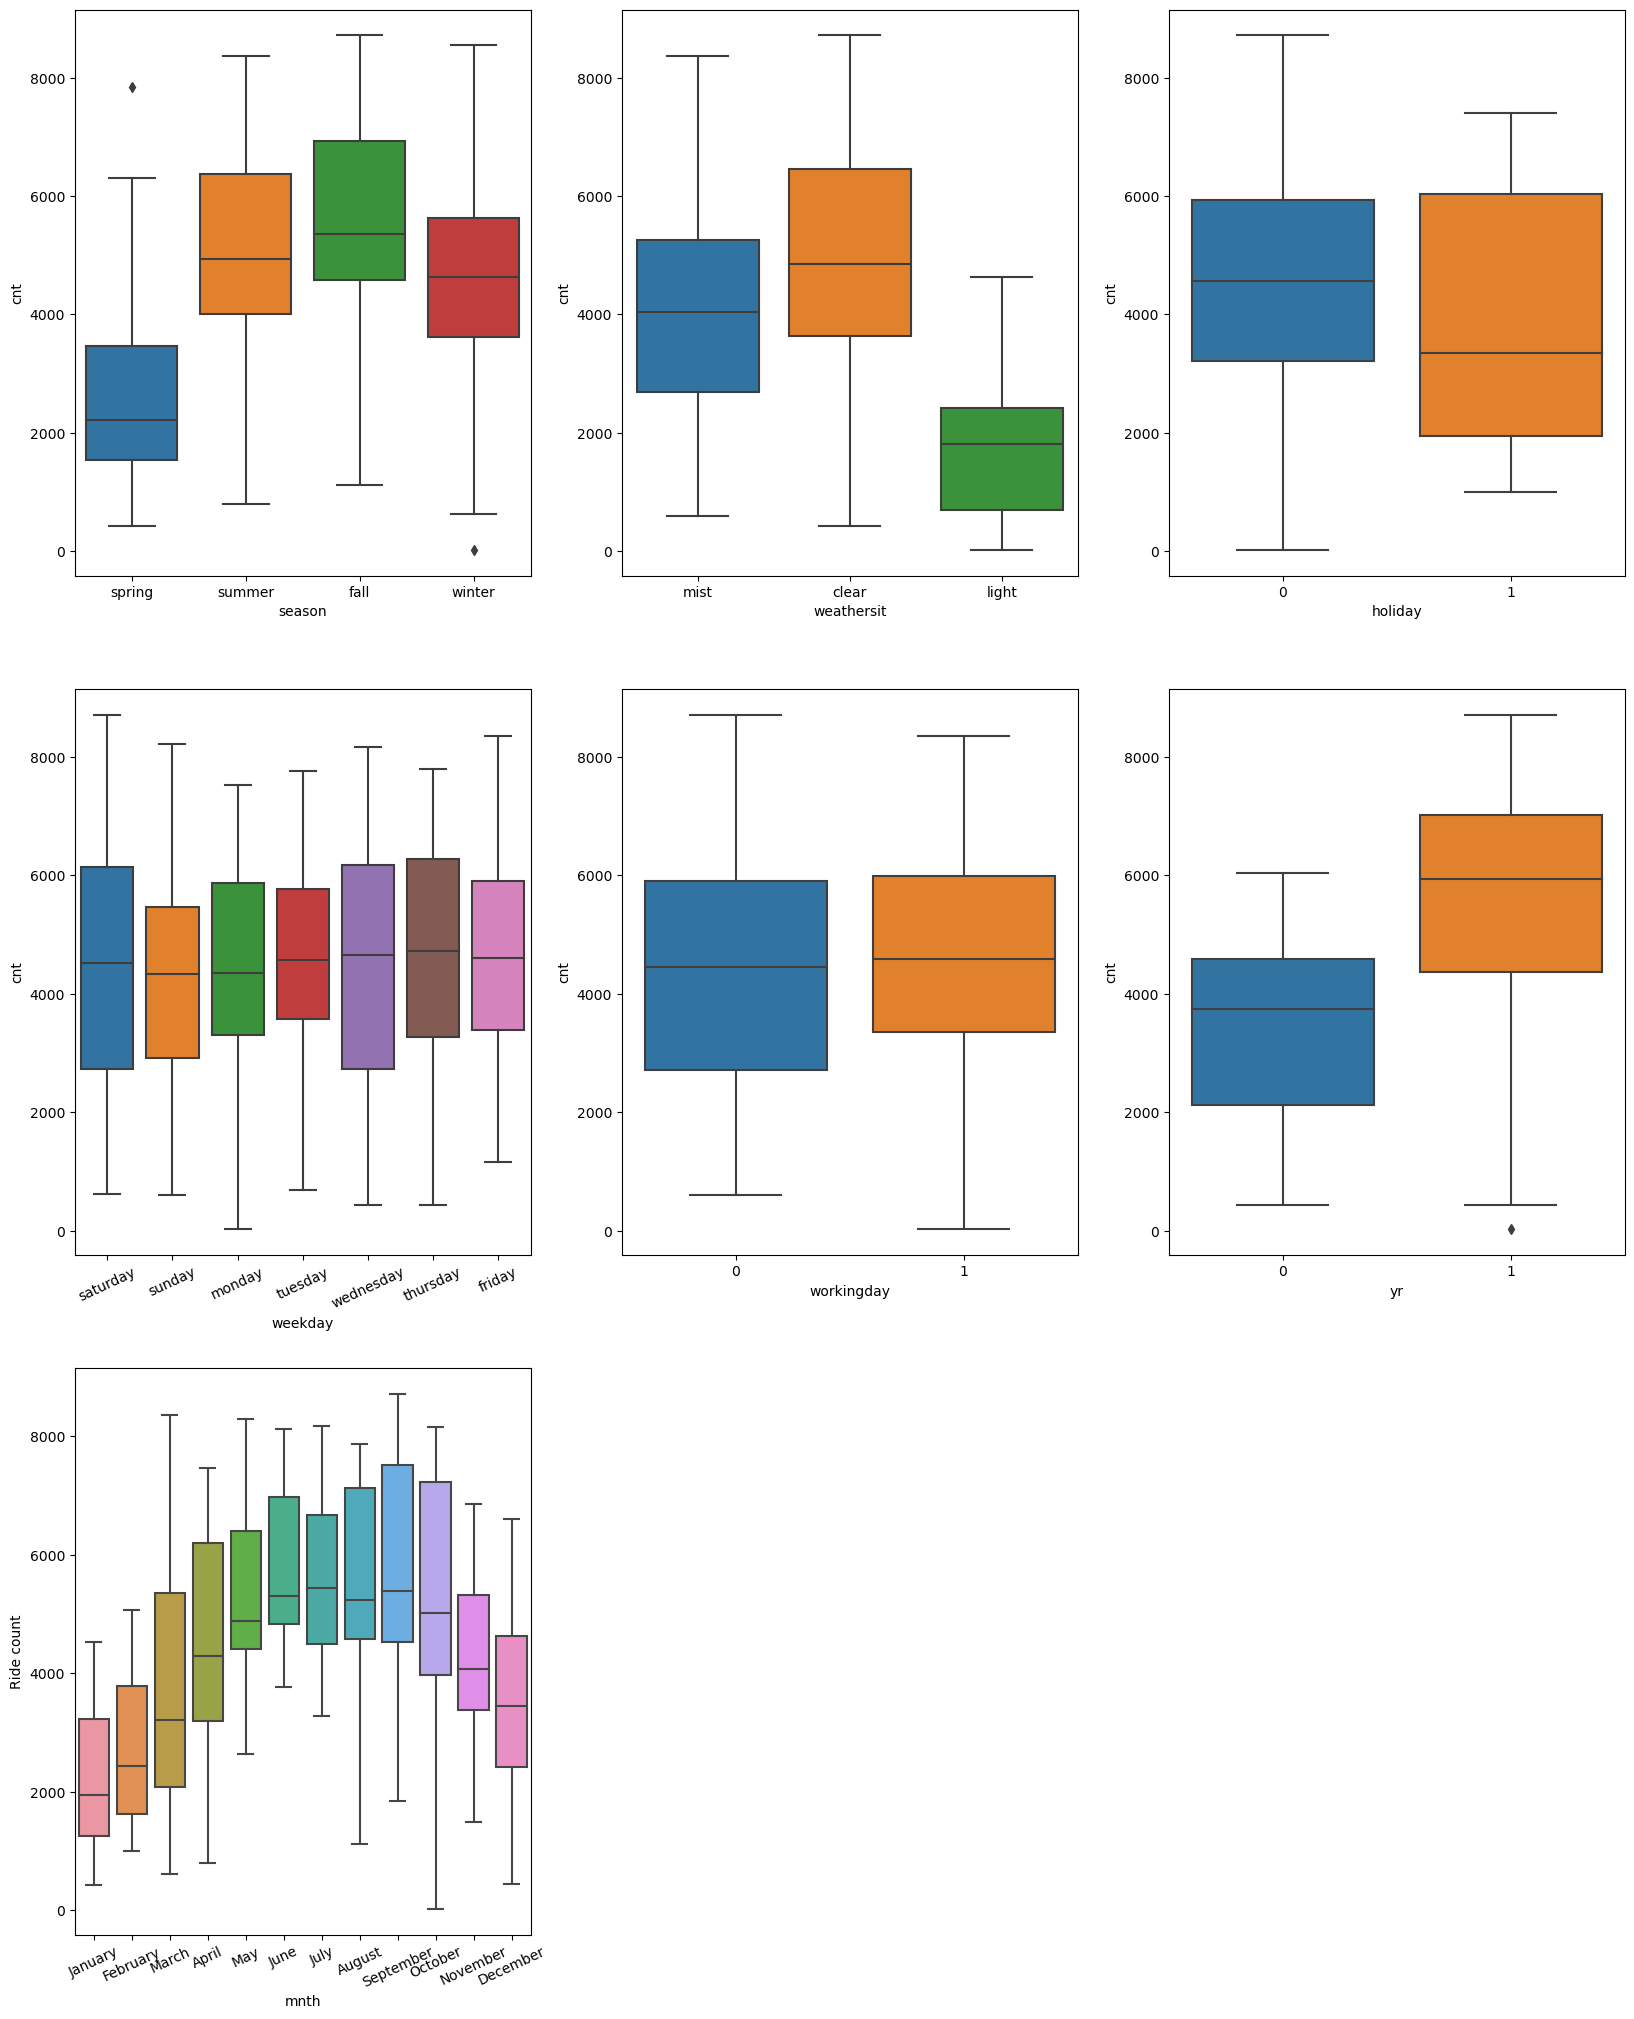

In [38]:
plt.figure(figsize=(20, 25))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.xticks(rotation = 25)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.xticks(rotation = 25)
plt.ylabel('Ride count')
plt.show()

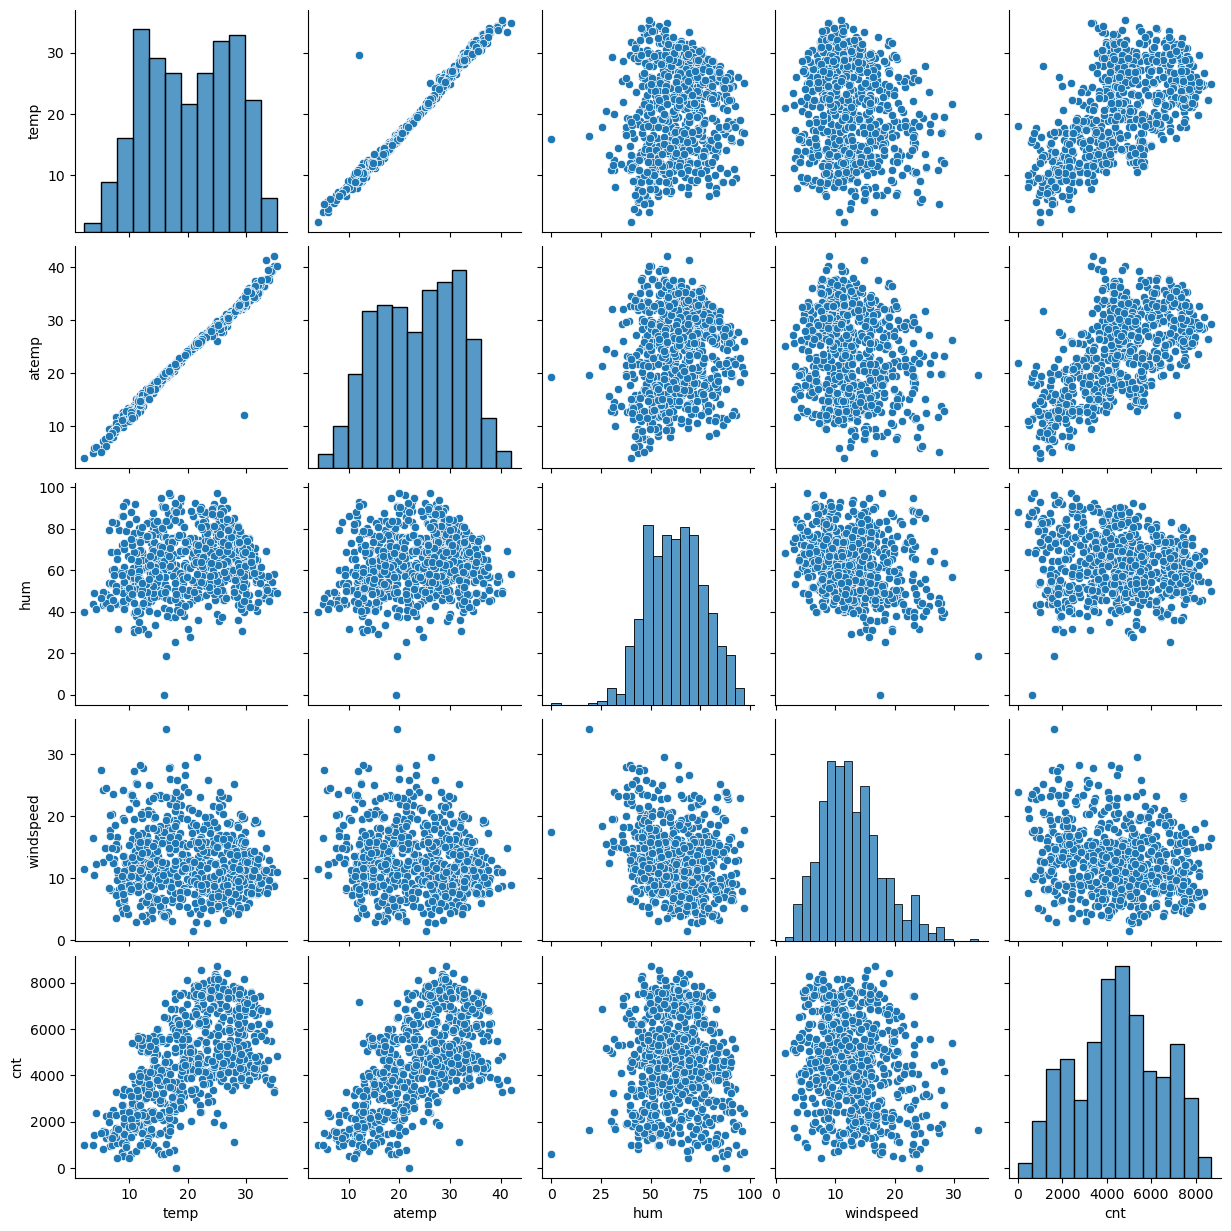

In [39]:
## Now, Analysing numerical columns
sns.pairplot(data=df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

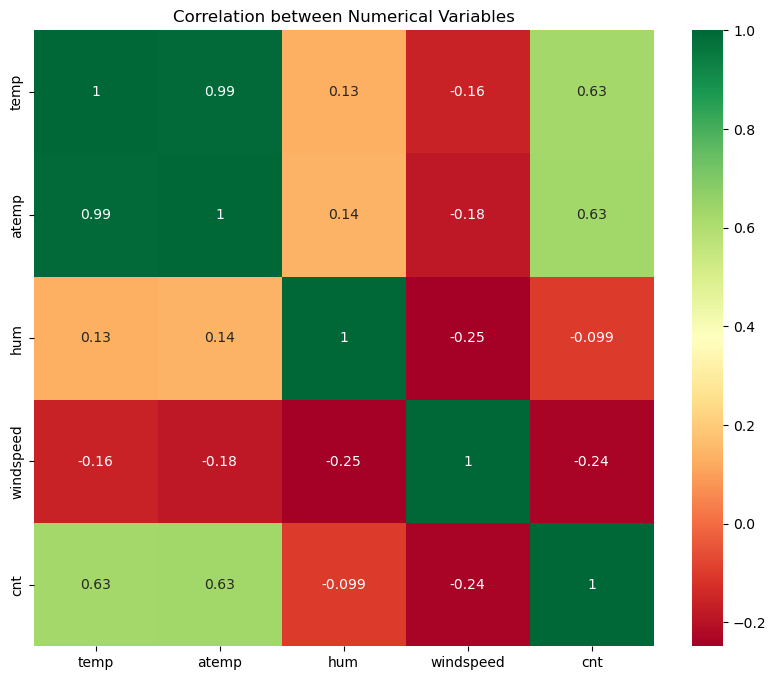

In [40]:
# check correlation numerical variables
correlation=df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation, annot = True, cmap="RdYlGn")
plt.title("Correlation between Numerical Variables")
plt.show()


Temp and atemp has almost same correlation,based on the assumption of multicollinearity, both cannot be used.
Hence we can decide which one to drop based on VIF and p-value later in the model building process.


Text(0.5, 0, 'Temperature')

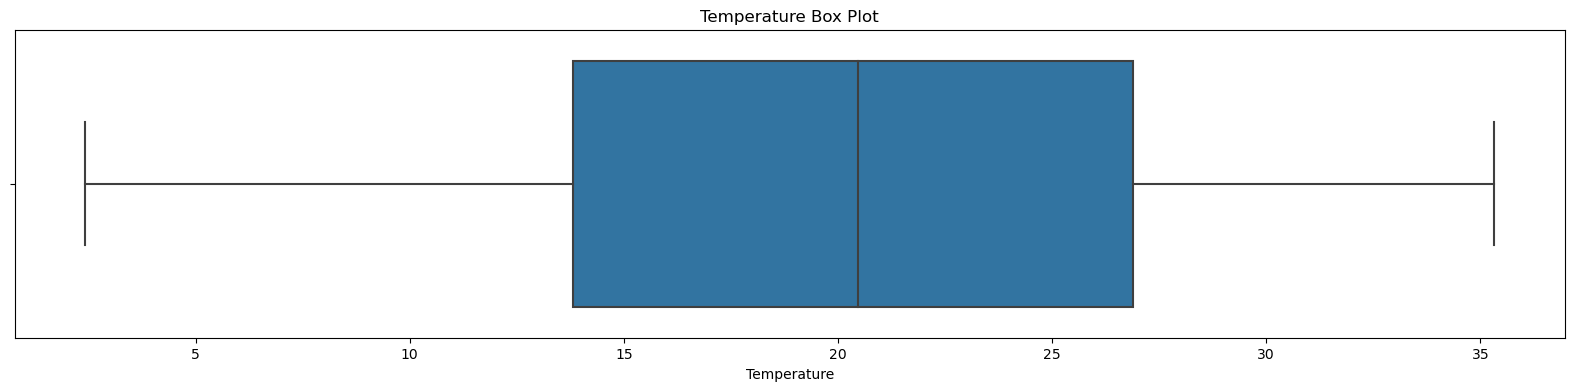

In [41]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=df, x='temp')
plt.title('Temperature Box Plot')
plt.xlabel('Temperature')

Temperature is in the valid range between slightly less than 15 to slightly greater than 25, hence we will keep this variable.

Text(0.5, 0, 'Adjusted Temperature')

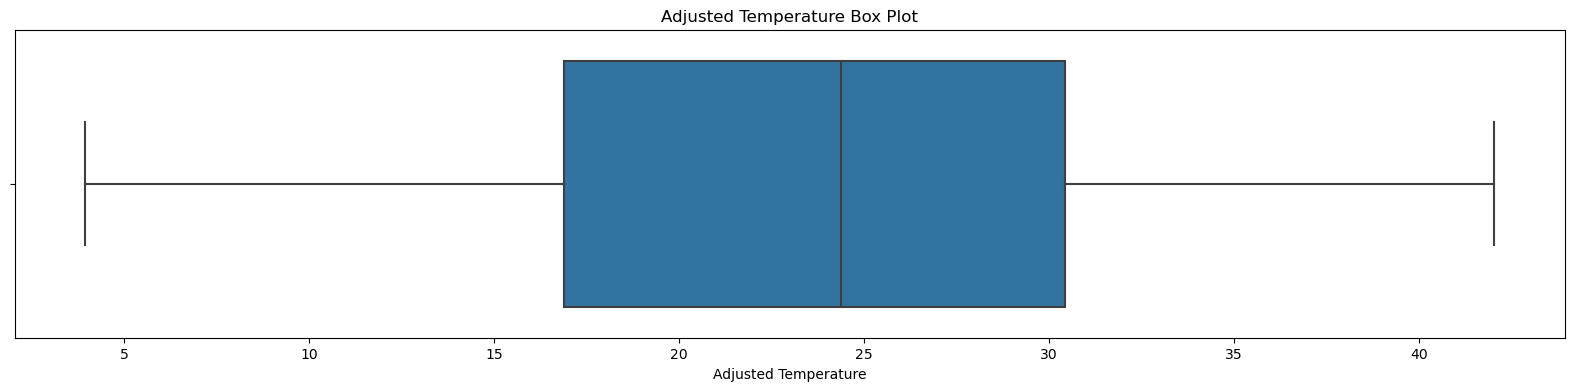

In [42]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=df, x='atemp')
plt.title('Adjusted Temperature Box Plot')
plt.xlabel('Adjusted Temperature')

Atemp is almost the same as temp. Just that the plot is bit moved towards right with higher values of temperature.

<Axes: ylabel='Density'>

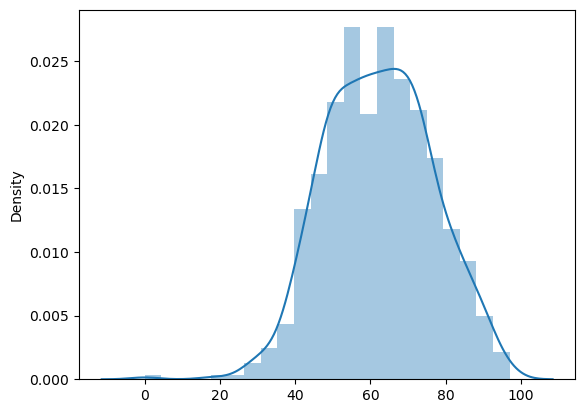

In [43]:
## Plotting of humidity column
sns.distplot(df , x=df.hum.astype(int))

The humidity follows a normal distribution and mostly lies between the range of 20 to 100, very few values visible near 0 might be outliers, also in general humidity value cannot be zero so it is treated as outlier as it might be any data error while measuring the data.

<Axes: ylabel='Density'>

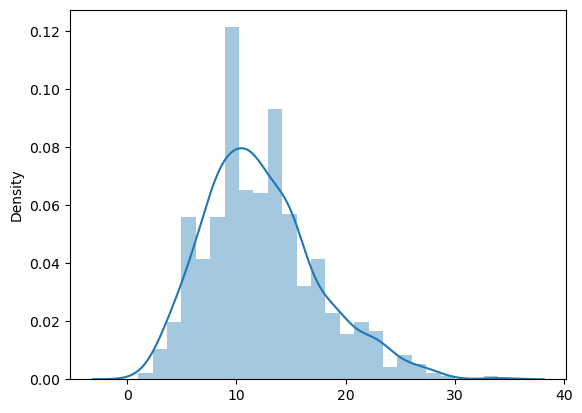

In [44]:
## Plotting of windspeed column
sns.distplot(df , x=df.windspeed.astype(int))

Windspeed also falls within the range. Hence this will be taken into account.

#### Inferences from Visualization

So far we have visualized and analyzed the data. Let us consolidate whatever we have inferences so far on each variable.
1. Comparing 2018 and 2019, the year 2019 has increased number of bookings with respect to almost all variables.
2. Fall seems to be season where highest number of bookings happened.
3. Ride count increased between June to October as they correspond to Summer and Fall seasons in USA.
4. Bookings is less on holidays compared to the other days which is reasonable.
5. Working day or non-working day seems similar, not much difference.
6. Ride count is higher on clear days and then on mist days other than light.
7. Temperature and Adjusted temperature seems to have almost the same correlation, hence based on VIF and p-value we will drop one of them. They have a strong positive correlation with ride count.
8. Humidity and windspeed will be considered as they lie between a valid range. But doesn't give us much information based on just visualizing the data, hence we will include them in the model to take a look on how it affects.
9. Thursday, Friday, Saturday have an increase in the number of bookings compared to the rest of the days in the week.
10. September month seems to have highest number of bookings.


# Step 4 - Data preparation and transformation

#### One Hot Encoder is used for encoding categorical variables

In [45]:
## Need to do dummy encoding for categorical variables that we have already mapped in the previous step 2
dummy_variables_cat_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [46]:
encoded_values = pd.get_dummies(df[dummy_variables_cat_columns], drop_first=True)
encoded_values.head()

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
data_df = pd.concat([df, encoded_values], axis=1)

In [48]:
data_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,1,spring,0,January,0,saturday,0,mist,14.110847,18.18125,...,0,0,0,1,0,0,0,0,0,1
1,2,spring,0,January,0,sunday,0,mist,14.902598,17.68695,...,0,0,0,0,1,0,0,0,0,1
2,3,spring,0,January,0,monday,1,clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,4,spring,0,January,0,tuesday,1,clear,8.200000,10.60610,...,0,0,0,0,0,0,1,0,0,0
4,5,spring,0,January,0,wednesday,1,clear,9.305237,11.46350,...,0,0,0,0,0,0,0,1,0,0


In [49]:
data_df=data_df.drop(columns = dummy_variables_cat_columns)

In [50]:
data_df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,1,0,0,0,0,0,1
1,2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,1,0,0,0,0,1
2,3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,1,0,0,0
4,5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,1,0,0


In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dteday             730 non-null    int64  
 1   yr                 730 non-null    int64  
 2   holiday            730 non-null    int64  
 3   workingday         730 non-null    int64  
 4   temp               730 non-null    float64
 5   atemp              730 non-null    float64
 6   hum                730 non-null    float64
 7   windspeed          730 non-null    float64
 8   cnt                730 non-null    int64  
 9   mnth_August        730 non-null    uint8  
 10  mnth_December      730 non-null    uint8  
 11  mnth_February      730 non-null    uint8  
 12  mnth_January       730 non-null    uint8  
 13  mnth_July          730 non-null    uint8  
 14  mnth_June          730 non-null    uint8  
 15  mnth_March         730 non-null    uint8  
 16  mnth_May           730 non

In [52]:
data_df.shape

(730, 31)

# Step 5 - Split data into train and test sets

1. Train Data (The model will be built based on this train data)
2. Test Data (The model will be tested based on this test data)

Usually 70-30 or 80-20 split will be done, but for this use case we are going to consider 70-30 split which means training data will comprise of 70% of the data and 30% of the data will be test data that the model will never see while building/training it.

In [53]:
## splitting the new data into train and test sets
np.random.seed(0)
df_train, df_test= train_test_split(data_df, train_size=0.7, random_state=100)

In [54]:
## shape of training dataset
df_train.shape 

(510, 31)

In [55]:
##shape of test dataset
df_test.shape

(220, 31)

### Scaling/Normalizing

#### Numerical variables need to be scaled/normalized to be used effectively in the model 

In [56]:
numerical_variables_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']


In [57]:
scaler=MinMaxScaler()

In [58]:
df_train[numerical_variables_columns] = scaler.fit_transform(df_train[numerical_variables_columns])
df_train.head(10)

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
576,31,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,0,1,0,0,0
426,3,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,...,0,0,0,1,0,0,0,0,0,1
728,30,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,...,0,0,0,0,1,0,0,0,0,0
482,28,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,1,0,0,1,0,0,0,0,0,1
111,22,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,...,1,0,0,0,0,0,0,0,0,1
580,4,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,...,0,0,0,1,0,0,0,0,0,0
500,16,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,...,1,0,0,0,0,0,0,1,0,0
479,25,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,...,1,0,0,0,0,0,0,1,0,0
472,18,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,...,1,0,0,0,0,0,0,1,0,1
455,1,1,0,0,0.456929,0.443956,0.696865,0.279394,0.692476,0,...,1,0,0,0,1,0,0,0,0,1


In [59]:
df_train.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,15.592157,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,...,0.247059,0.247059,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,8.911833,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,...,0.431725,0.431725,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


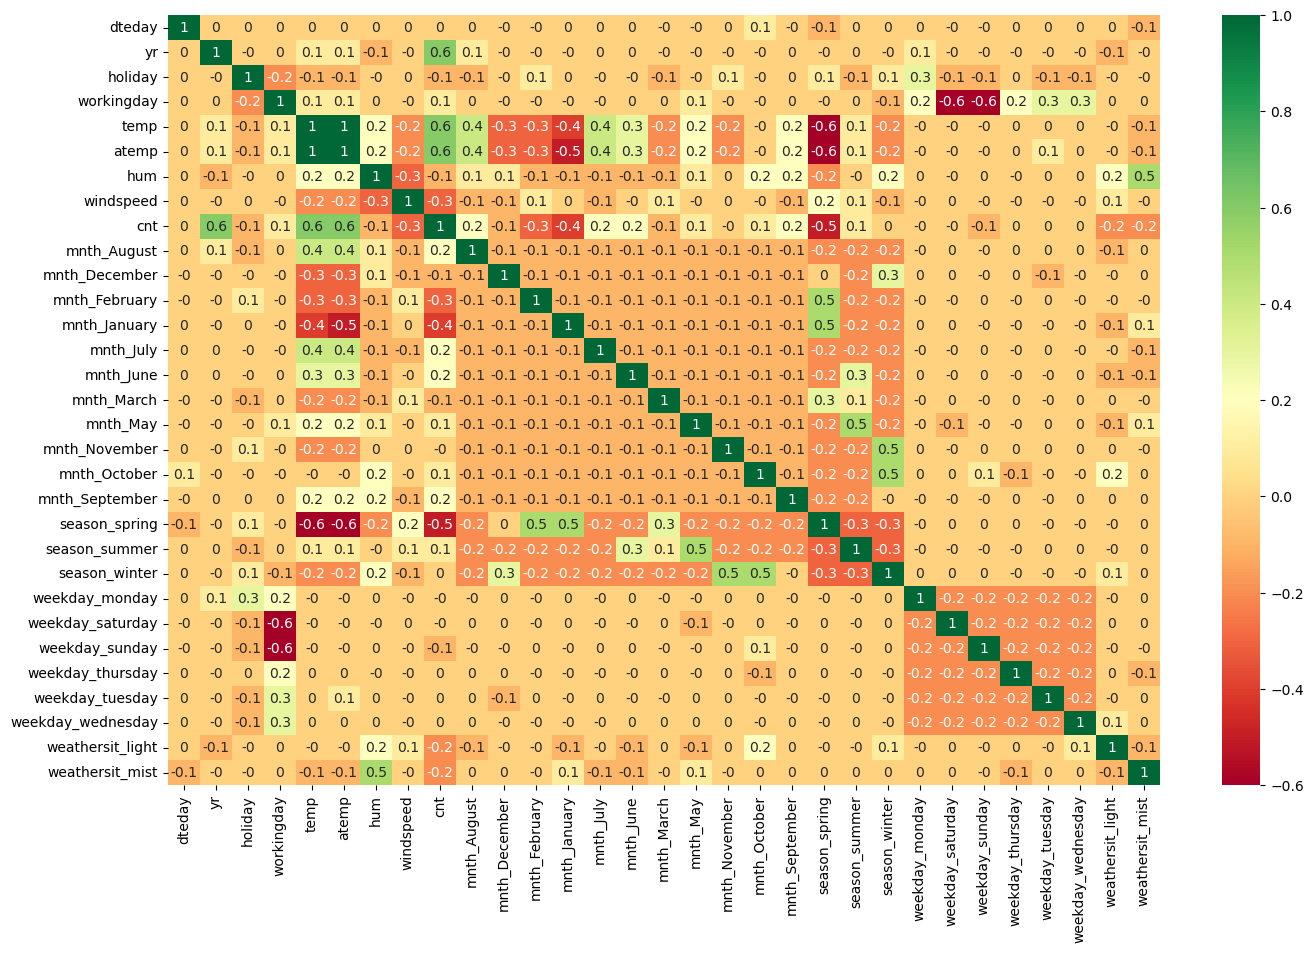

In [60]:
## Check the correlation of this dataset to identify which variables are correlated 

plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(),1), annot=True, cmap='RdYlGn')
plt.show()

Most of the maximum correlation that we can get to see from the above correlation heatmap is 0.6 and -0.6. From the heatmap, cnt is having correlation with year,temp and atemp. Similarly, humidity and mist have correlation. And with respect to seasons, spring has correlation with Jan and Feb month, summer with may and winter with oct and nov month having around 0.5 correlation.

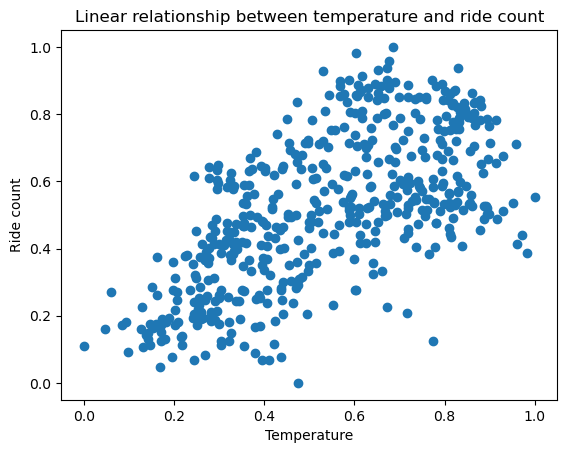

In [61]:
## There is a positive correlation between temperature and cnt

plt.scatter(df_train.temp, df_train.cnt)
plt.xlabel('Temperature')
plt.ylabel('Ride count')
plt.title('Linear relationship between temperature and ride count')
plt.show()


# Step 6 - Model Building

In [62]:
##Defining target variable
y_train=df_train.pop('cnt')
y_train

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
         ...   
578    0.832835
53     0.218017
350    0.312586
79     0.236424
520    0.802922
Name: cnt, Length: 510, dtype: float64

In [63]:
X_train=df_train

###  Iterative Modeling

There are around 31 Predictors, we need to remove the ones which doesn't add value to our model to determine the target variable. Hence we will be following a hybrid approach to eliminate them and build a model. 


#### Recursive Feature Elimination  (RFE) 

We are using this to reduce 31 to 15, that is we will consider the first 15 features for now to see how it is affecting the model, as most of the other variables are like dummy variables that we have created and performed encoding, so top 15 features we will consider to build the model and this top features are found out by RFE method


In [64]:
lm=LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm, n_features_to_select=15)
rfe=rfe.fit(X_train, y_train)

In [65]:
rfe_df=pd.DataFrame({"Features":X_train.columns, 'Status':rfe.support_, 'Ranking':rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Features,Status,Ranking
29,weathersit_mist,True,1
21,season_winter,True,1
20,season_summer,True,1
19,season_spring,True,1
18,mnth_September,True,1
28,weathersit_light,True,1
23,weekday_saturday,True,1
11,mnth_January,True,1
12,mnth_July,True,1
7,windspeed,True,1


We have got the top 15 features, we will eliminate the ones which is not useful one by one when building the model.

In [66]:
## Selecting only the variables which have 'True' as status in rfe.support_
cols=X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'mnth_January', 'mnth_July', 'mnth_September', 'season_spring',
       'season_summer', 'season_winter', 'weekday_saturday',
       'weathersit_light', 'weathersit_mist'],
      dtype='object')


In [67]:
## Checking VIF - Variance Inflation Factor
def getVIF(df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = df.columns
    vif_df['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

#### Model Building Method - 1 (statsmodels.api)

p-value>0.05 might be coefficiently insignificant. VIF>10 needs to be dropped and VIF between 5 to 10, decisions can be based on business perspective and domain knowledge

In [68]:
##Building the model - using statsmodels.api 
X_train_rfe = X_train[cols]

#add a constant -- Model 1
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          4.22e-191
Time:                        08:22:51   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2519      0.036      6.969      0.000       0.181       0.323
yr                   0.2305      0.008     28.795      0.000       0.215       0.246
holiday             -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday           0.0433      0.012      3.762      0.000       0.021       0.066
temp                 0.5096      0.034     14.837      0.000       0.442       0.577
hum                 -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed           -0.1863      0.025     -7.310      0.000      -0.236      -0.136
mnth_January        -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_July           -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_September       0.0814      0.016      4.945      0.000       0.049       0.114
season_spring       -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer        0.0508      0.015      3.423      0.001       0.022       0.080
season_winter        0.0933      0.017      5.403      0.000       0.059       0.127
weekday_saturday     0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_light    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_mist     -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the above summary we can get the p-values for predictors

In [69]:
getVIF(X_train_rfe)

,Features,VIF
0,hum,29.37
1,temp,17.78
2,workingday,5.31
3,windspeed,4.73
4,season_spring,4.53
5,season_winter,3.46
6,season_summer,2.85
7,weathersit_mist,2.29
8,yr,2.09
9,weekday_saturday,1.98


Humidity shows very high VIF value, hence let us drop this and re-build the model 

In [70]:
## dropping the humidity variable
X_train_1=X_train_rfe.drop(['hum'], axis=1)

##Calculate the new VIF
getVIF(X_train_1)


,Features,VIF
0,temp,7.07
1,workingday,5.24
2,windspeed,4.68
3,season_spring,3.07
4,season_summer,2.34
5,yr,2.08
6,season_winter,1.98
7,weekday_saturday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


In [71]:
## Model 2
X_train_sm_2=sm.add_constant(X_train_1)
lr_2=sm.OLS(y_train, X_train_sm_2)
lr_model_2=lr_2.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          1.60e-188
Time:                        08:23:01   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1737      0.031      5.520      0.000       0.112       0.235
yr                   0.2345      0.008     29.009      0.000       0.219       0.250
holiday             -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday           0.0464      0.012      3.966      0.000       0.023       0.069
temp                 0.4722      0.034     14.005      0.000       0.406       0.538
windspeed           -0.1563      0.025     -6.286      0.000      -0.205      -0.107
mnth_January        -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_September       0.0755      0.017      4.527      0.000       0.043       0.108
season_spring       -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer        0.0445      0.015      2.967      0.003       0.015       0.074
season_winter        0.0784      0.017      4.562      0.000       0.045       0.112
weekday_saturday     0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_light    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_mist     -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can drop holiday variable as it has high p-value - 0.042

In [72]:
## dropping the holiday variable
X_train_2=X_train_1.drop(['holiday'], axis=1)

##Calculate the new VIF
getVIF(X_train_2)

,Features,VIF
0,temp,6.82
1,workingday,4.68
2,windspeed,4.66
3,season_spring,2.99
4,season_summer,2.33
5,yr,2.08
6,season_winter,1.91
7,weekday_saturday,1.84
8,mnth_January,1.62
9,mnth_July,1.59


VIF doesnt seems to be affected much after dropping 2 variables. Let us check the p values

In [73]:
## Model 3
X_train_sm_3=sm.add_constant(X_train_2)
lr_3=sm.OLS(y_train, X_train_sm_3)
lr_model_3=lr_3.fit()
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          8.68e-189
Time:                        08:23:09   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1657      0.031      5.292      0.000       0.104       0.227
yr                   0.2346      0.008     28.941      0.000       0.219       0.251
workingday           0.0546      0.011      4.967      0.000       0.033       0.076
temp                 0.4724      0.034     13.966      0.000       0.406       0.539
windspeed           -0.1572      0.025     -6.306      0.000      -0.206      -0.108
mnth_January        -0.0398      0.018     -2.252      0.025      -0.074      -0.005
mnth_July           -0.0468      0.018     -2.549      0.011      -0.083      -0.011
mnth_September       0.0736      0.017      4.406      0.000       0.041       0.106
season_spring       -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer        0.0448      0.015      2.980      0.003       0.015       0.074
season_winter        0.0775      0.017      4.499      0.000       0.044       0.111
weekday_saturday     0.0667      0.014      4.710      0.000       0.039       0.094
weathersit_light    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_mist     -0.0807      0.009     -9.351      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value for mnth_January is 0.25, hence let us drop this variable and check as it is coefficiently insignificant.

In [74]:
## dropping the holiday variable
X_train_3=X_train_2.drop(['mnth_January'], axis=1)

##Calculate the new VIF
getVIF(X_train_3)

,Features,VIF
0,temp,6.73
1,workingday,4.66
2,windspeed,4.64
3,season_spring,2.38
4,season_summer,2.32
5,yr,2.07
6,season_winter,1.91
7,weekday_saturday,1.83
8,mnth_July,1.58
9,weathersit_mist,1.57


In [75]:
## Model 4
X_train_sm_4=sm.add_constant(X_train_3)
lr_4=sm.OLS(y_train, X_train_sm_4)
lr_model_4=lr_4.fit()
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):          7.12e-189
Time:                        08:23:14   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1492      0.031      4.881      0.000       0.089       0.209
yr                   0.2339      0.008     28.756      0.000       0.218       0.250
workingday           0.0545      0.011      4.938      0.000       0.033       0.076
temp                 0.4920      0.033     14.991      0.000       0.427       0.556
windspeed           -0.1499      0.025     -6.040      0.000      -0.199      -0.101
mnth_July           -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_September       0.0740      0.017      4.414      0.000       0.041       0.107
season_spring       -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_summer        0.0481      0.015      3.196      0.001       0.019       0.078
season_winter        0.0838      0.017      4.910      0.000       0.050       0.117
weekday_saturday     0.0664      0.014      4.671      0.000       0.038       0.094
weathersit_light    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_mist     -0.0817      0.009     -9.428      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

All of the p-values seems to get settled based on the above report and are under control.

Now, based on the VIF values, anything between 5 to 10 needs to be still drilled down, but this is also based on domain knowledge and business perspective, hence based on our output, this seems to be good, so we can fix this set of predictors as the set of features for our regression model. 

#### Based on the LR summary, we can see that R^2 value is around 0.84 which is good. 
#### F-Statistics value of 217.2 (which is greater than 1) and the probability of F-Statistic is 7.12e-189 i.e. almost equals to zero. This implies that our overall model is significant.

In [76]:
## Getting the params and coefficient values
lr_model_4.params

const               0.149243
yr                  0.233901
workingday          0.054531
temp                0.491976
windspeed          -0.149935
mnth_July          -0.048584
mnth_September      0.074009
season_spring      -0.066433
season_summer       0.048061
season_winter       0.083810
weekday_saturday    0.066385
weathersit_light   -0.288317
weathersit_mist    -0.081652
dtype: float64

# Step 7 - Residual Analysis

Residual analysis needs to be performed to prove and validate that the model that we built holds true for all the assumptions of linear regression which needs to be satisfied.

###  Linear Regression Assumptions - Validation

#### 1. Normally distributed Error Terms

Checking whether the distribution of error is around zero or not. Sum of residual error terms = 0

In [77]:
X_train_sm_4

,const,yr,workingday,temp,windspeed,mnth_July,mnth_September,season_spring,season_summer,season_winter,weekday_saturday,weathersit_light,weathersit_mist
576,1.0,1,1,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,0,0,1,0,1
728,1.0,1,0,0.245101,0.663106,0,0,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,0,1,0,1
111,1.0,0,1,0.345824,0.380981,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,1,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,0,1,0,0,0,1


In [78]:
## Prediction on trained model
y_train_pred=lr_model_4.predict(X_train_sm_4)

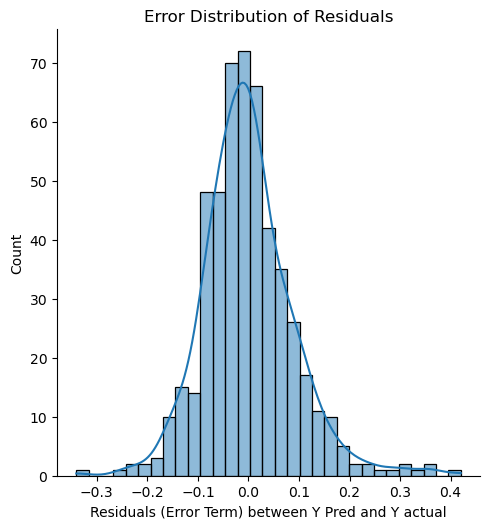

In [79]:
residual = y_train_pred - y_train
sns.displot(residual, kde=True)
plt.xlabel('Residuals (Error Term) between Y Pred and Y actual')
plt.title('Error Distribution of Residuals')
plt.show()

#### From the above plot, it is proved and validated that the error distribution follows a normal distribution approach across 0 and hence our model holds this assumption of Linear Regression.

#### 2. Homoscedasticity

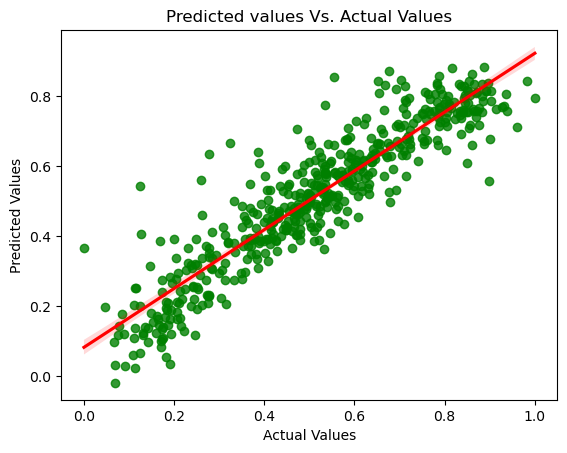

In [80]:
ax = sns.regplot(x=y_train, y=y_train_pred, scatter_kws={'color':'green'},line_kws={"color": "red"})
plt.title('Predicted values Vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#### The above regplot shows that residuals are equal distributed across predicted value. There is equal variance and there is nothing like concentration of values in certain specific areas alone. 
#### Indepndence of residuals - Durbin-Watson value of our model is 2.051 which signifies there is no autocorrelation. This proves and validates Homoscedasticity of Error Terms.

#### 3. Multicollinearity

In [81]:
getVIF(X_train_3)

,Features,VIF
0,temp,6.73
1,workingday,4.66
2,windspeed,4.64
3,season_spring,2.38
4,season_summer,2.32
5,yr,2.07
6,season_winter,1.91
7,weekday_saturday,1.83
8,mnth_July,1.58
9,weathersit_mist,1.57


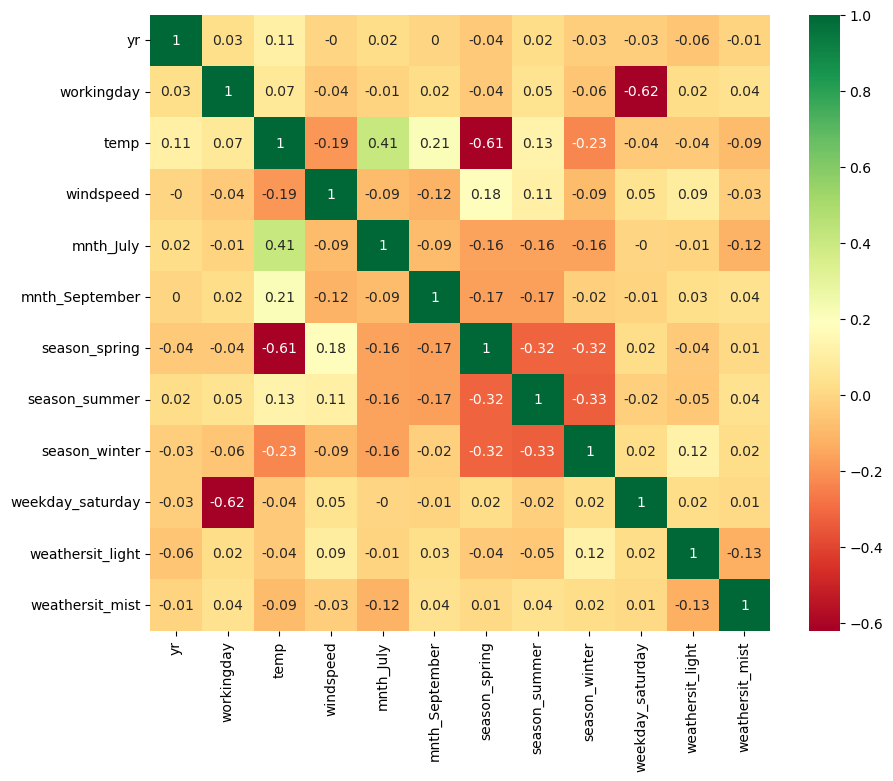

In [82]:
plt.figure(figsize=(10,8))
sns.heatmap(round(X_train_3.corr(),2),annot = True, cmap="RdYlGn")
plt.show()

#### VIF values holds good, even though the temperature value is above 5, the p-value associated with it is 0.00 and as per the business knowledge, temperature plays a major role in the bookings and its correlation shows a strong positive correlation when we calculated in the beginning. Hence this will not be omitted and will be one of the main predictors in our model.

There is no multicollinearity as seen from the above heatmap.

#### 4. Error terms being independent

The error terms being independent meaning that there should be no pattern or structure in the plot. 

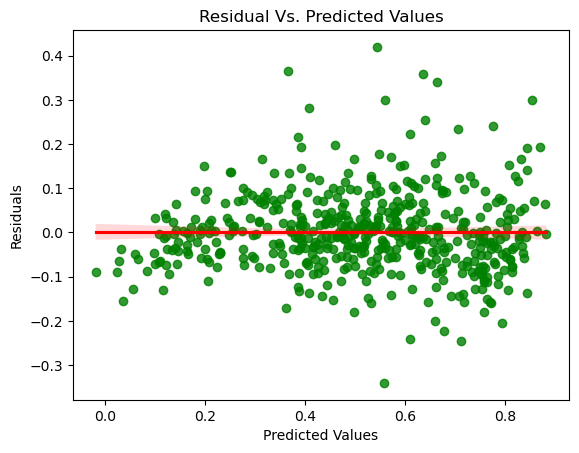

In [83]:
sns.regplot(x=y_train_pred, y=residual,scatter_kws={'color':'green'},line_kws={"color": "red"})
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#### 5. Linearity

<Figure size 600x600 with 0 Axes>

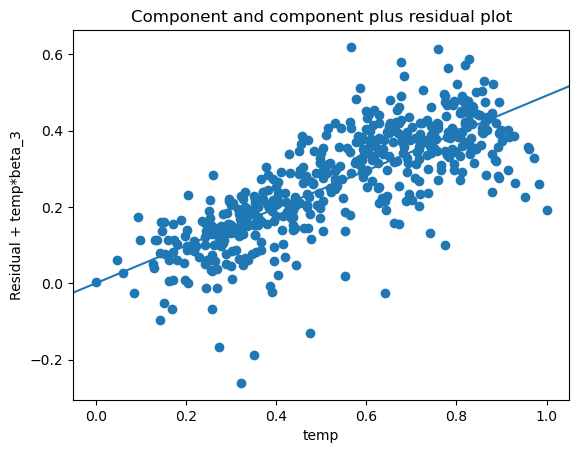

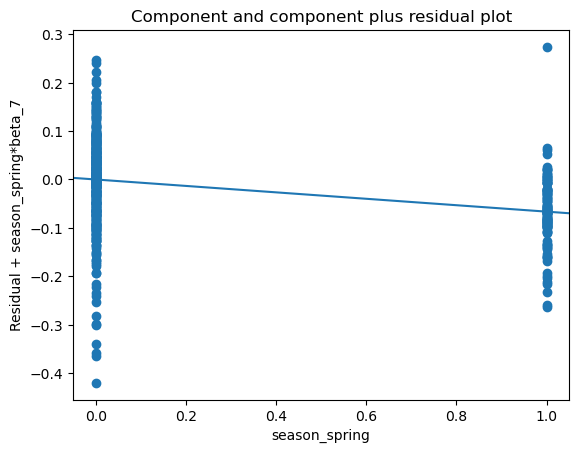

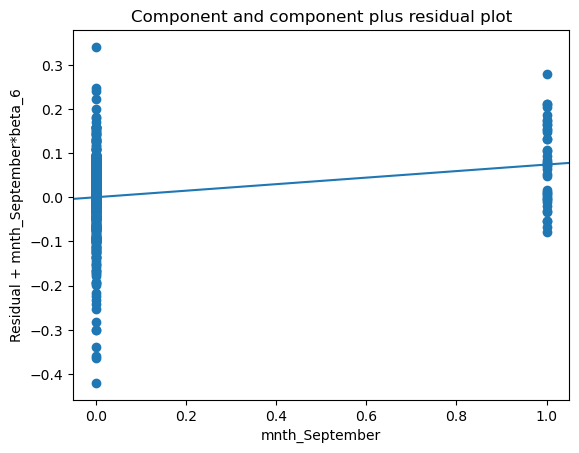

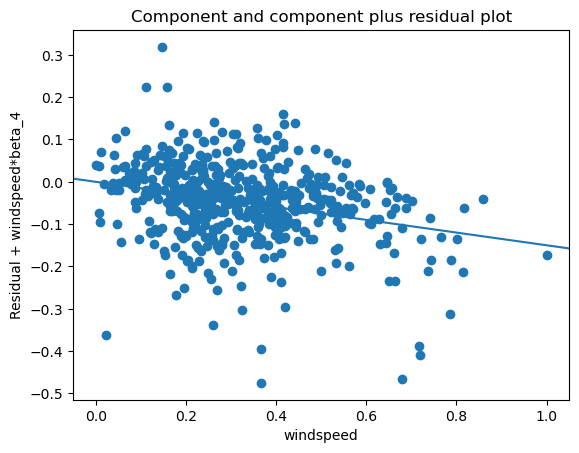

In [84]:
# Validating the Linear relationship using Component and component plus residual plot
plt.figure(figsize=(6,6))
sm.graphics.plot_ccpr(lr_model_4, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_model_4, 'season_spring')
plt.show()

sm.graphics.plot_ccpr(lr_model_4, 'mnth_September')
plt.show()

sm.graphics.plot_ccpr(lr_model_4, 'windspeed')
plt.show()


# Step 8 - Model Evaluation and Prediction against Test Set

We have built the model and have a proper fit, validated against the assumptions of linear regression and holds good. Now, let us evaluate and predict against the test dataset using our final model.


In [85]:
## Scale the test dataset
df_test[numerical_variables_columns] = scaler.transform(df_test[numerical_variables_columns])
df_test.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
184,4,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,...,0,0,1,0,0,0,0,0,0,1
535,20,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,...,1,0,0,0,0,0,0,1,0,0
299,27,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,...,0,1,0,0,0,1,0,0,0,1
221,10,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,...,0,0,0,0,0,0,0,1,0,0
152,2,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,...,1,0,0,0,0,1,0,0,0,0


In [86]:
df_test.describe()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,16.018182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,8.555467,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,1.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.750000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.500000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,31.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
y_test = df_test.pop('cnt')
X_test = df_test

In [88]:
## Keeping only the required features based on rfe columns
X_test_1= X_test[X_train_3.columns]
##add constant
X_test_sm_1 = sm.add_constant(X_test_1)

In [89]:
X_test_sm_1.head()

,const,yr,workingday,temp,windspeed,mnth_July,mnth_September,season_spring,season_summer,season_winter,weekday_saturday,weathersit_light,weathersit_mist
184,1.0,0,0,0.831783,0.084219,1,0,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,0,0,0,1,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,0,0,0,1,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,0,0,0,1,0,0,0,0


#### Now, Predicting the test data using the developed Model

In [90]:
y_test_pred = lr_model_4.predict(X_test_sm_1)

In [91]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8083

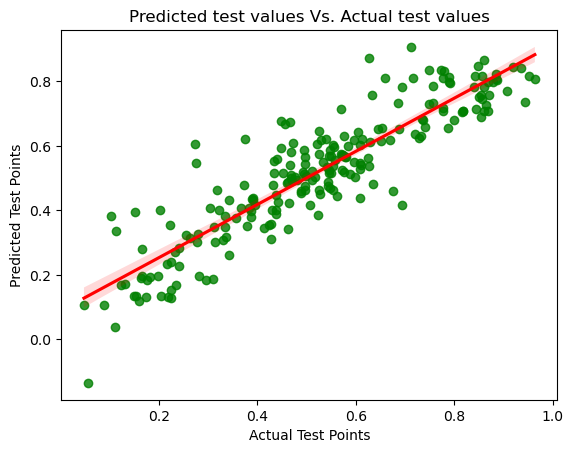

In [92]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred,scatter_kws={'color':'green'},line_kws={"color": "red"})
plt.title('Predicted test values Vs. Actual test values')
plt.xlabel('Actual Test Points')
plt.ylabel('Predicted Test Points')
plt.show()

In [93]:
round(lr_model_4.params,4)

const               0.1492
yr                  0.2339
workingday          0.0545
temp                0.4920
windspeed          -0.1499
mnth_July          -0.0486
mnth_September      0.0740
season_spring      -0.0664
season_summer       0.0481
season_winter       0.0838
weekday_saturday    0.0664
weathersit_light   -0.2883
weathersit_mist    -0.0817
dtype: float64

Hence, the equation of our best fitted line is 

##### cnt= 0.1492 + 0.2339	x yr + 0.0545 x	workingday	+ 0.492	x temp - 0.1499	x windspeed	- 0.0486 x	mnth_July	+ 0.074	x mnth_September - 0.0664 x season_spring + 0.0481 x season_summer + 0.0838 x season_winter	+ 0.0664 x weekday_saturday	- 0.2883 x weathersit_light	- 0.0817 x weathersit_mist	

In [96]:
##Calculated the r2 score of the test set
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8083

In [94]:
# Calculate Adjusted R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7779


## Comparision between Training and Testing dataset


    > Train dataset R^2          : 0.840
    > Test dataset R^2           : 0.8083
    > Train dataset Adjusted R^2 : 0.836    
    > Test dataset Adjusted R^2  : 0.7779

Hence, the demand of bikes depend on the following factors - year, working day, year, temperature, windspeed ,  mnth_July,     
mnth_September ,season_spring,   season_summer ,  season_winter ,weekday_saturday ,weathersit_light ,weathersit_mist  